[OK] Gráficos gerados para MAR → pasta: ./output/figs/2019-03
[OK] Gráficos gerados para ABR → pasta: ./output/figs/2019-04
[OK] Gráficos gerados para MAI → pasta: ./output/figs/2019-05
[OK] Gráficos gerados para JUN → pasta: ./output/figs/2019-06


/home/luiza/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


[OK] Gráficos gerados para DEZ → pasta: ./output/figs/2019-12


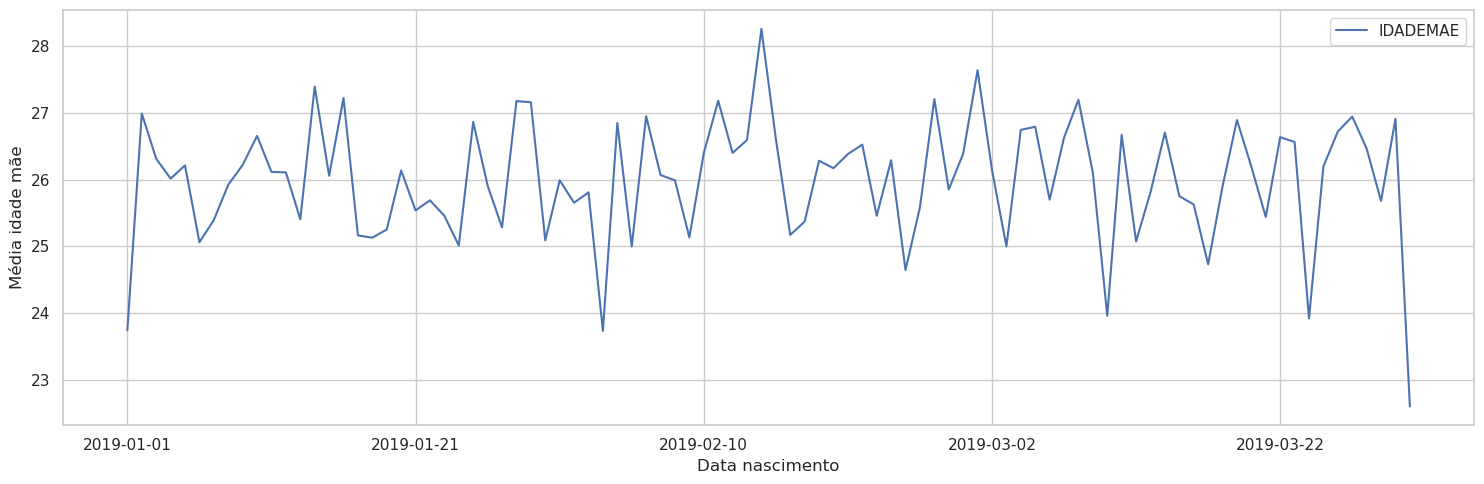

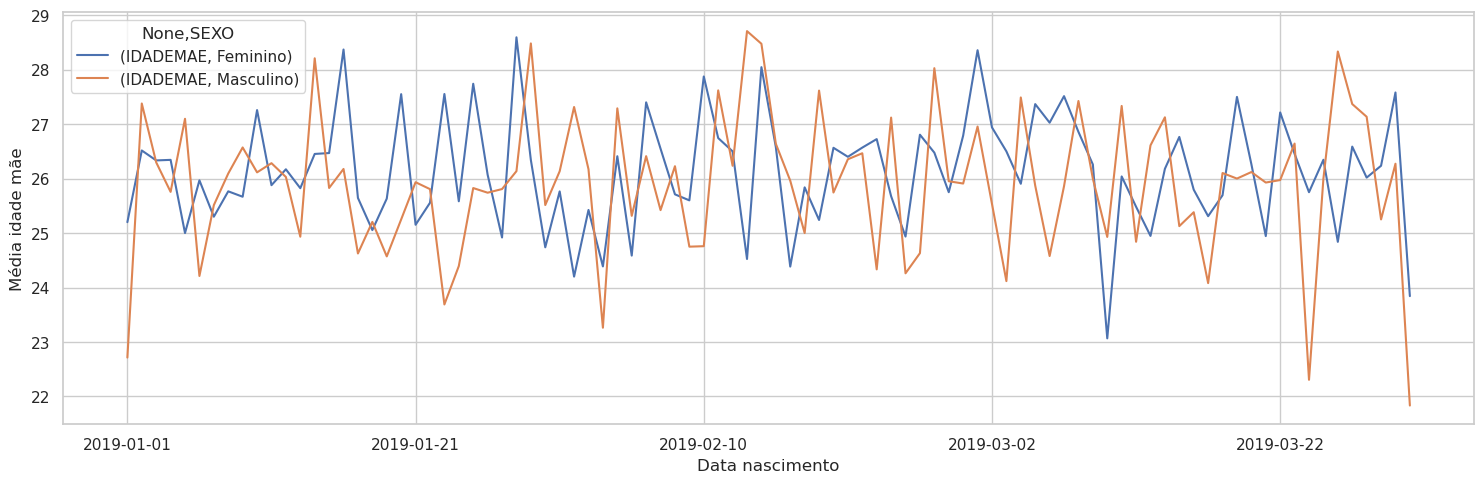

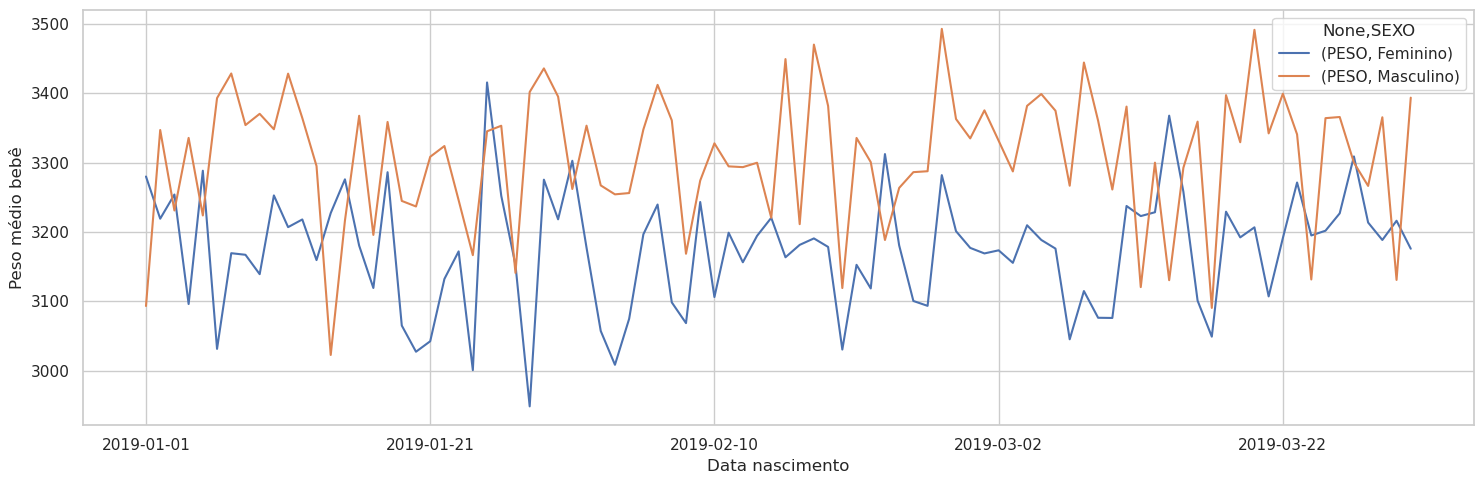

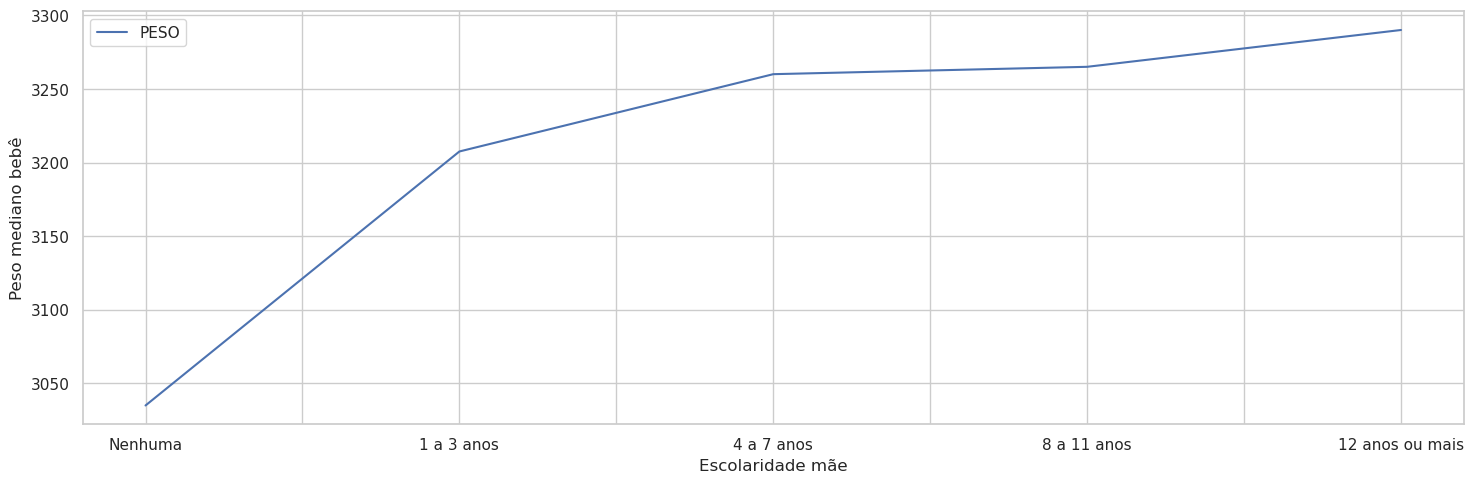

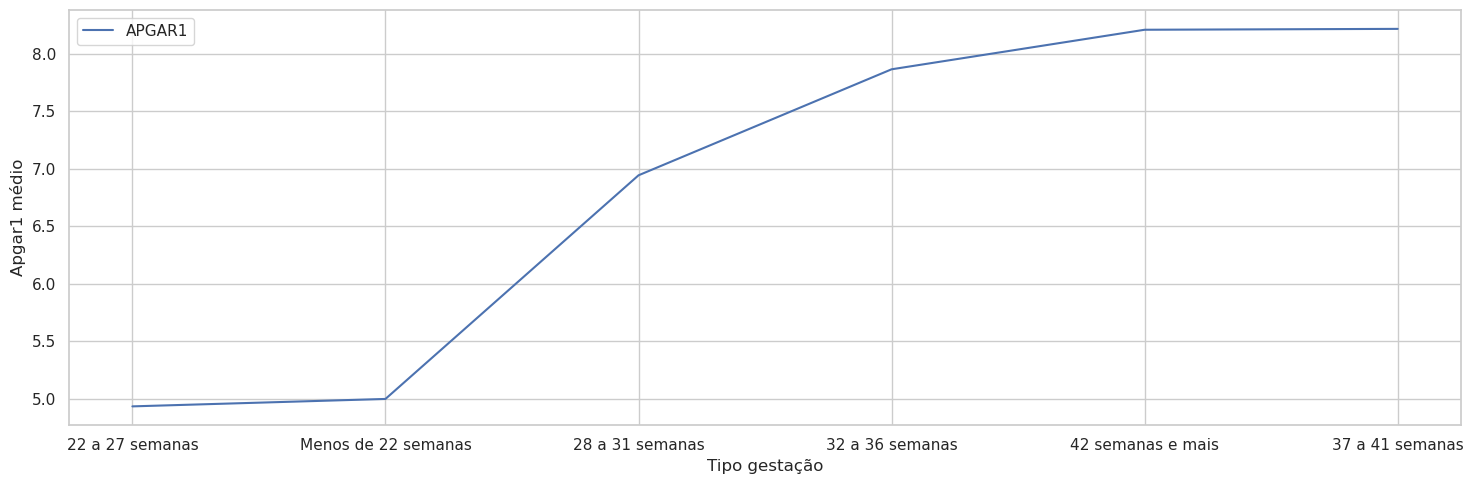

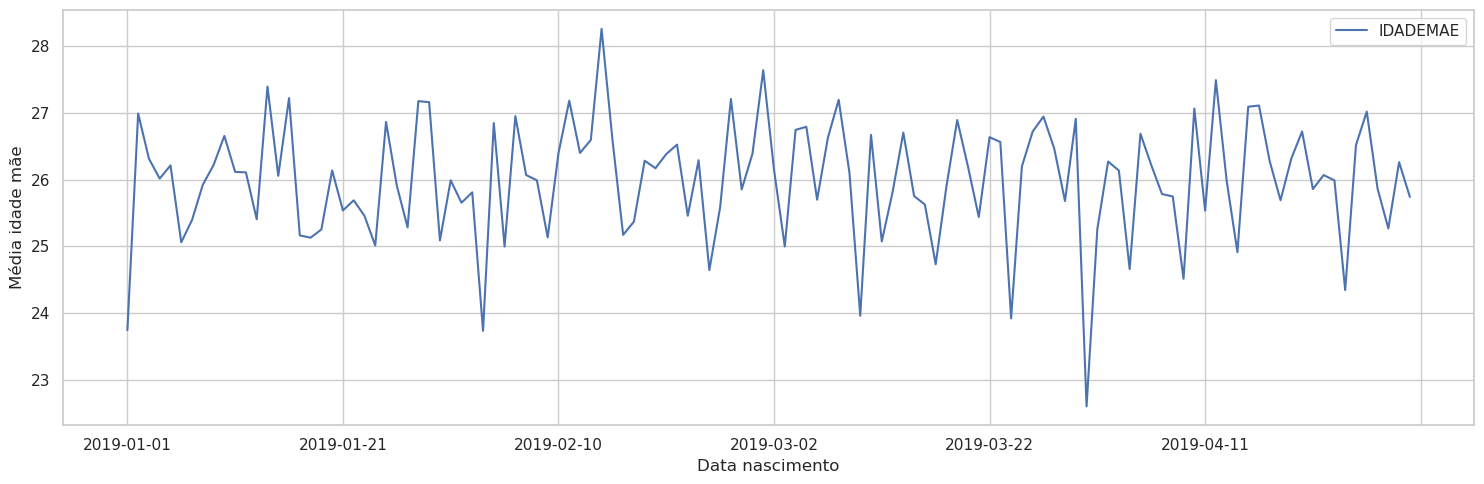

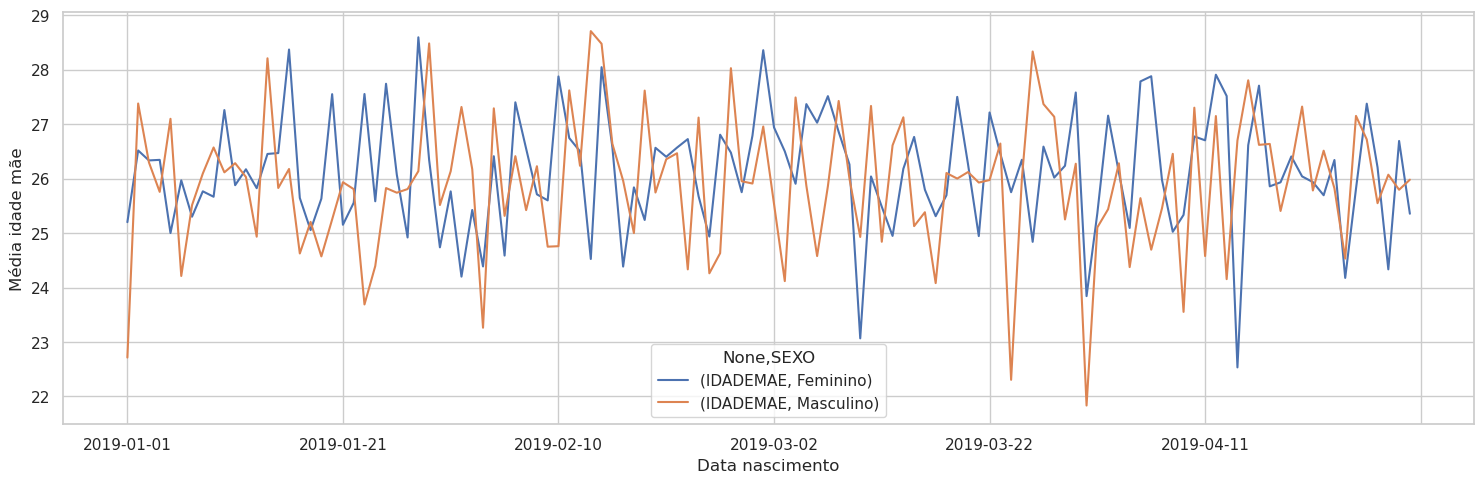

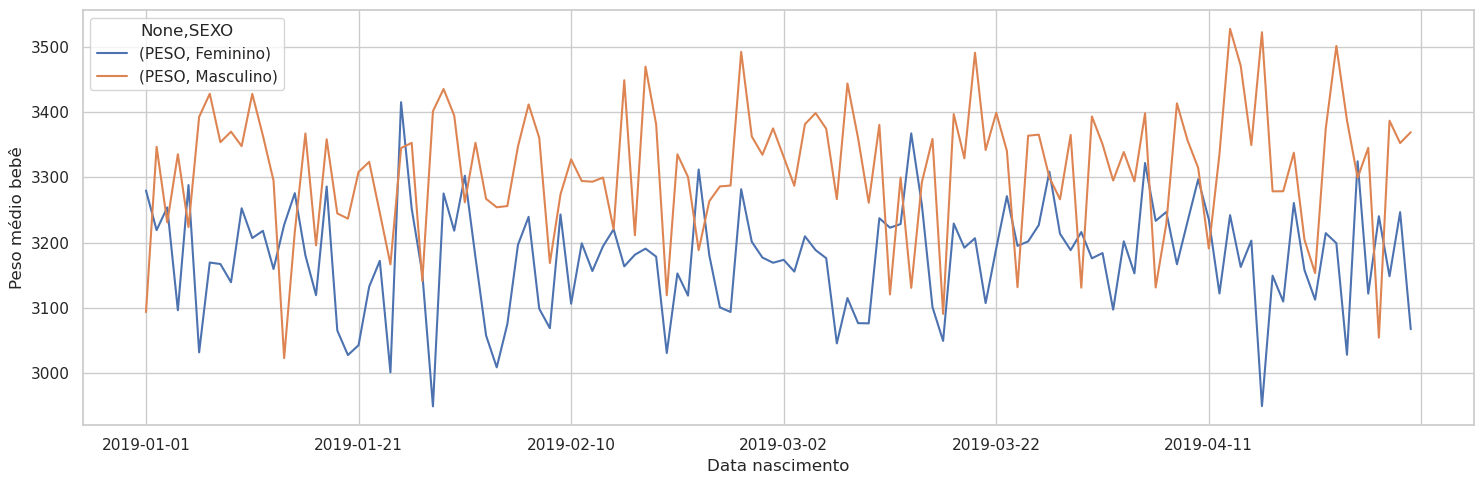

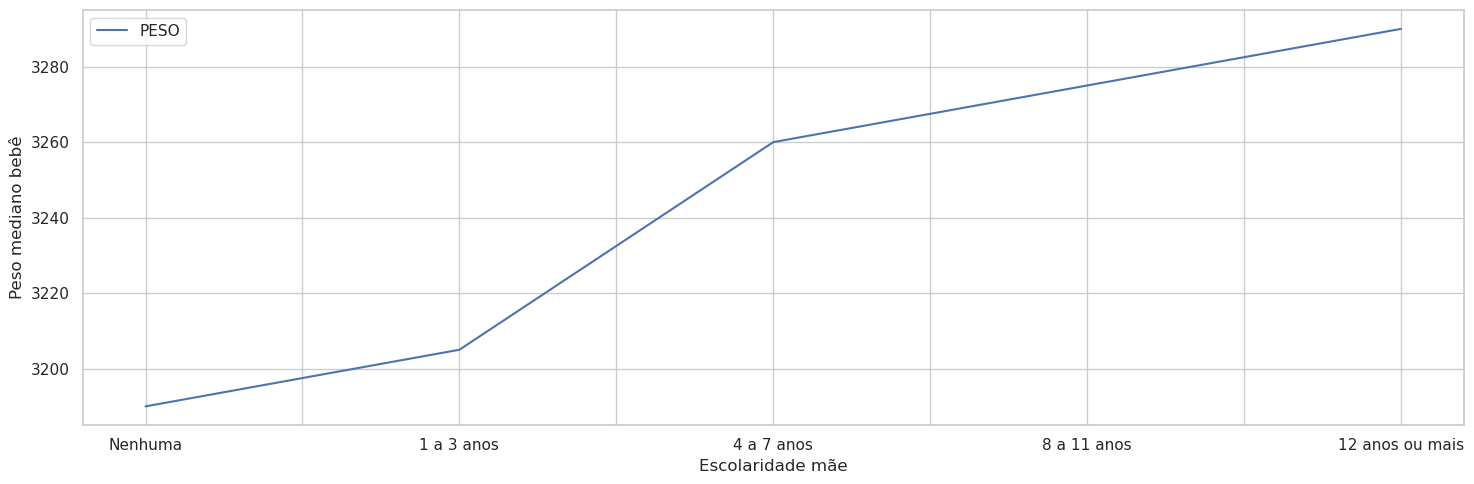

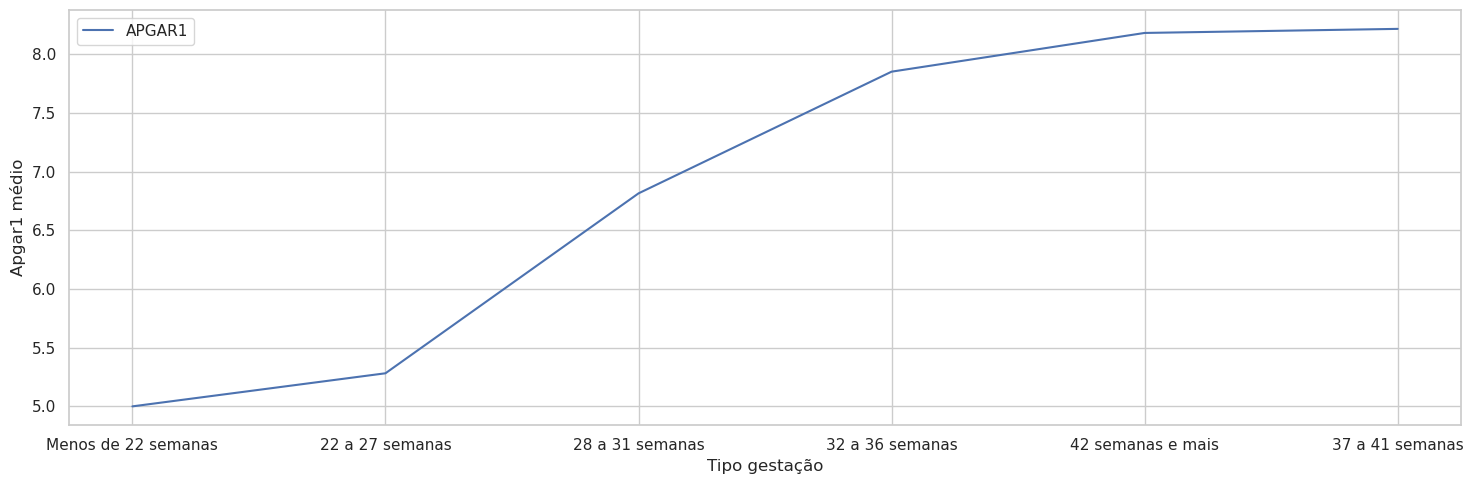

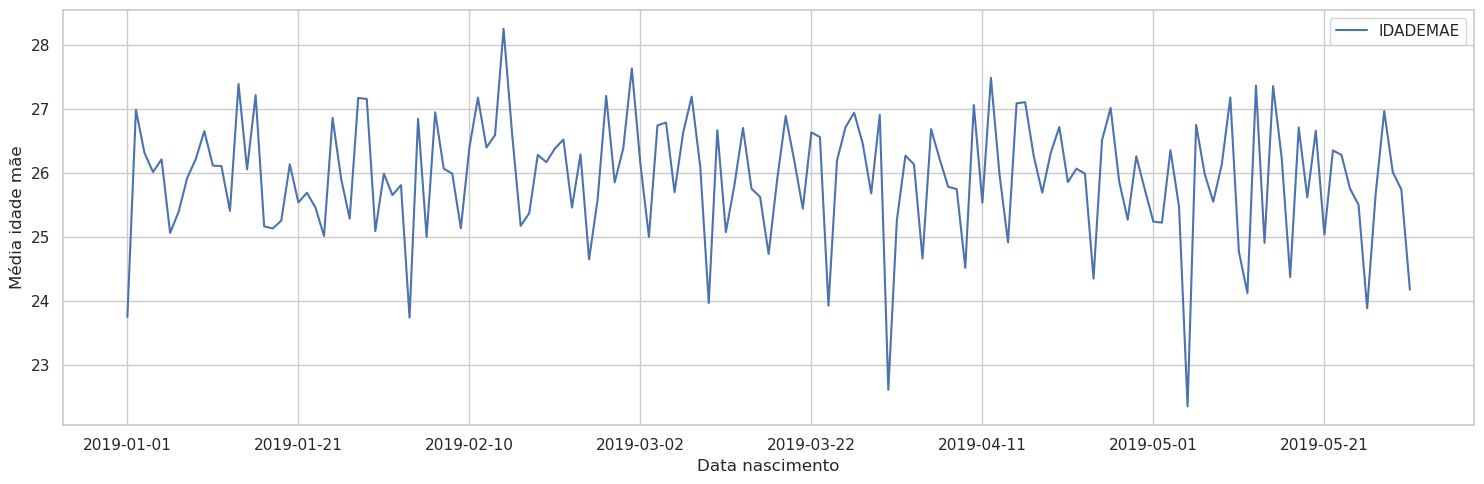

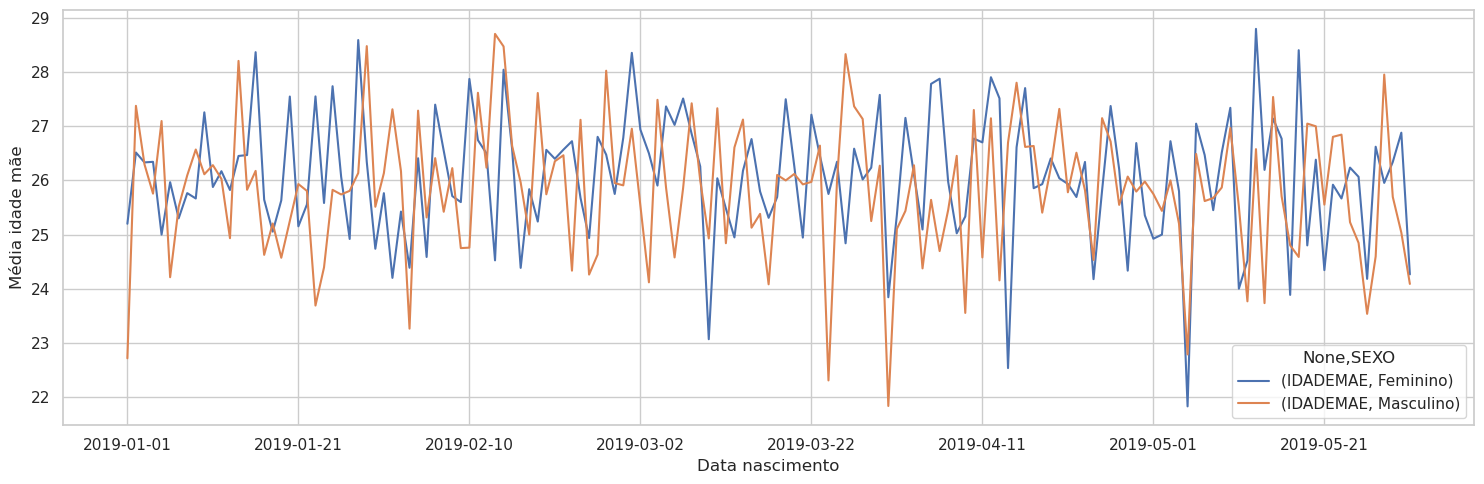

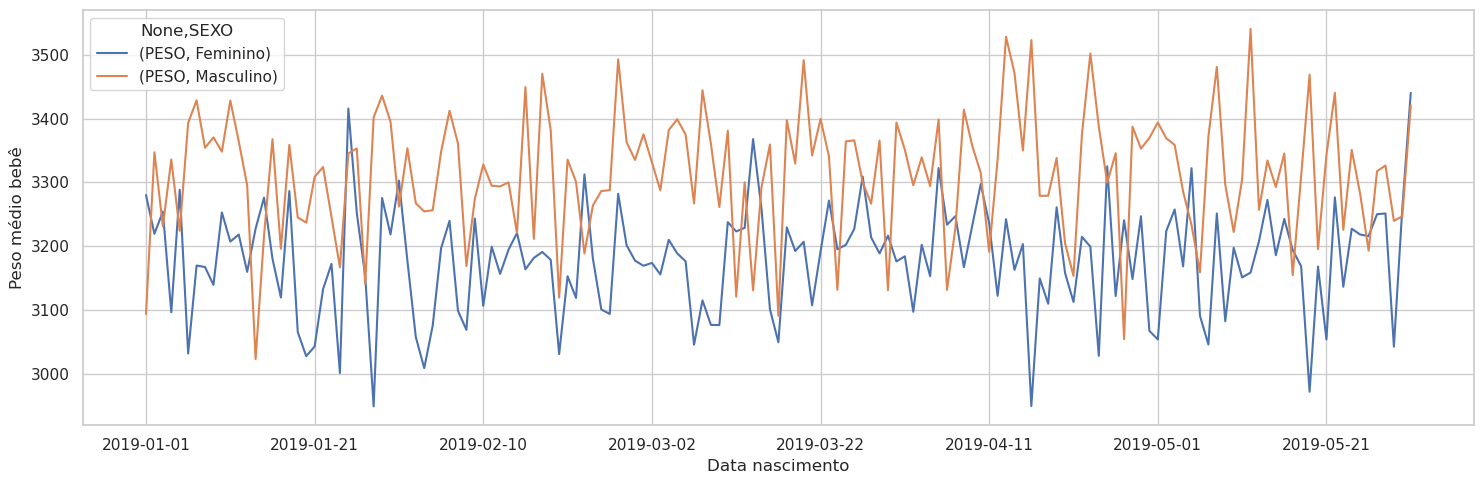

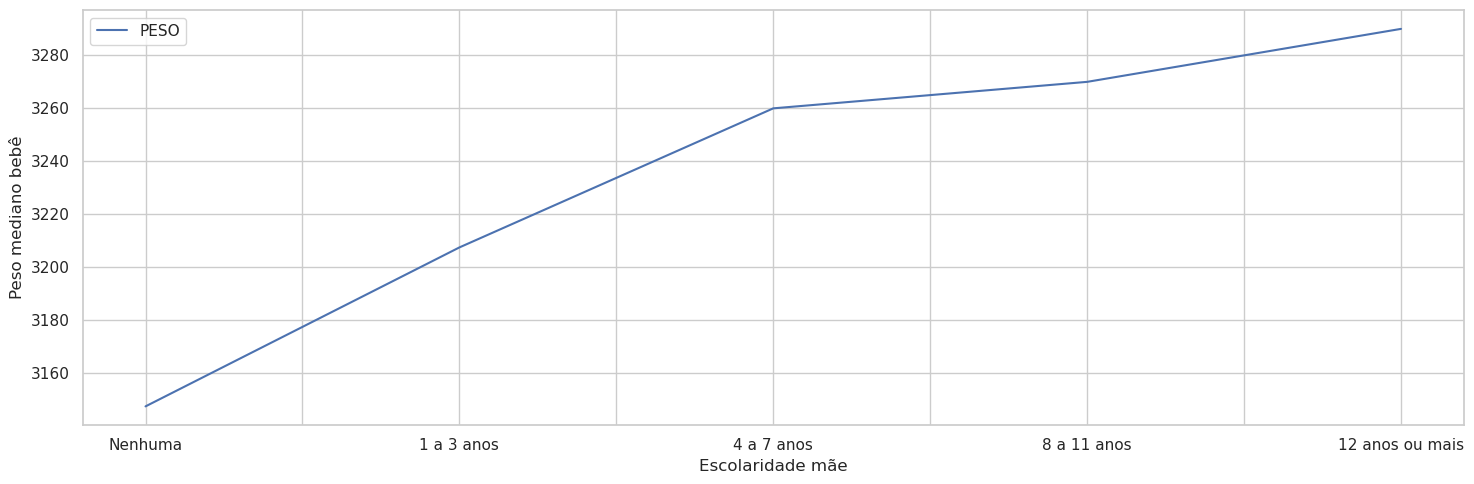

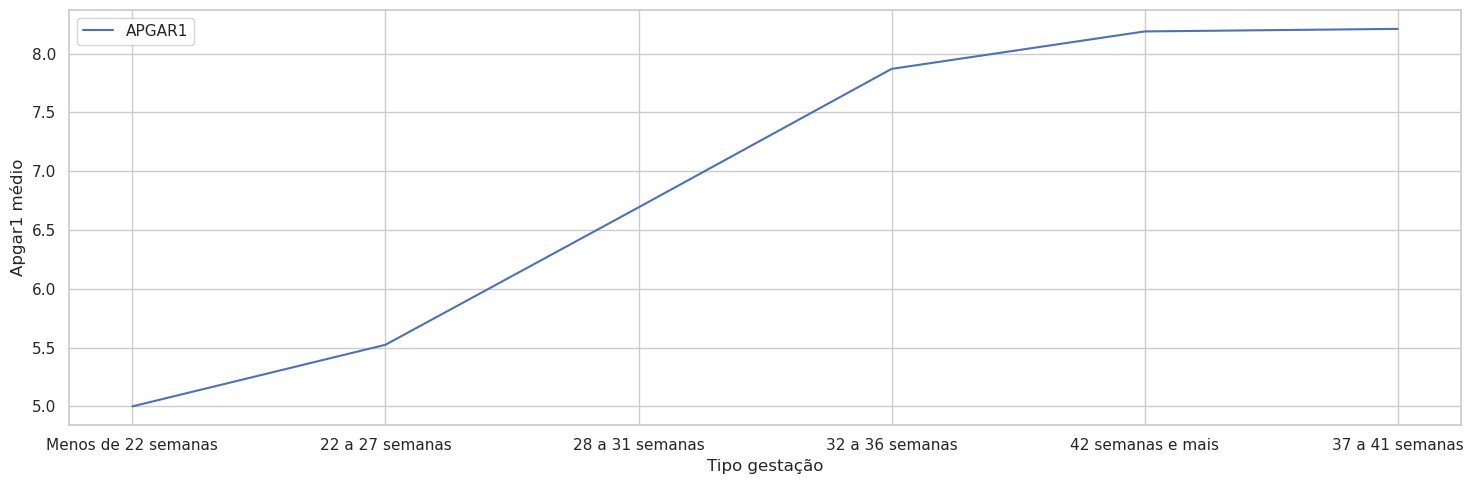

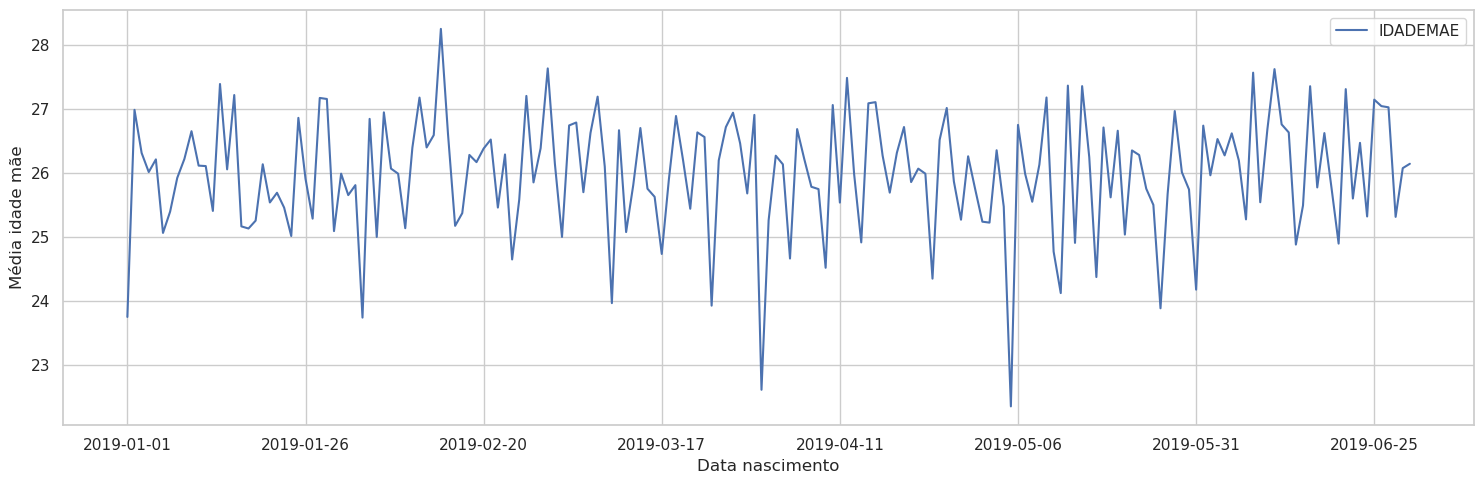

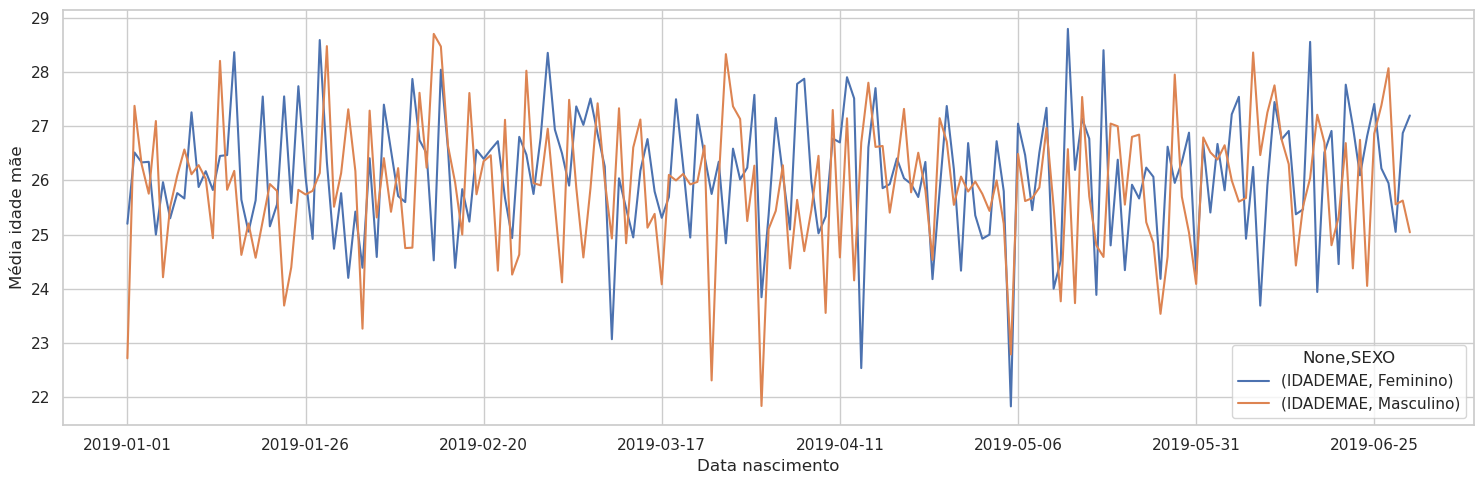

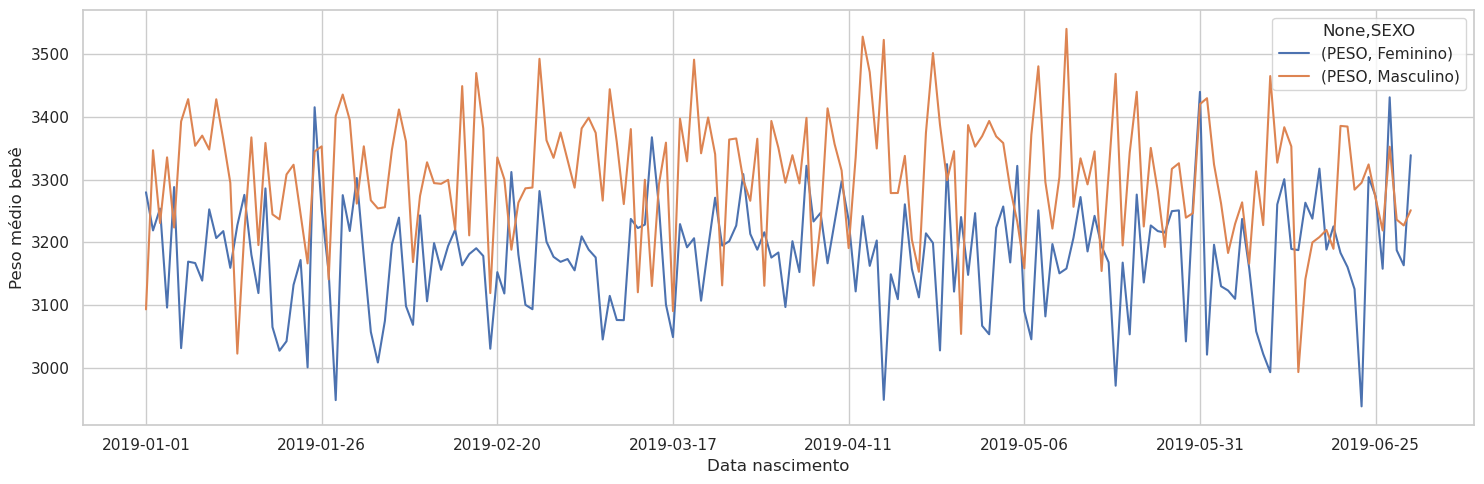

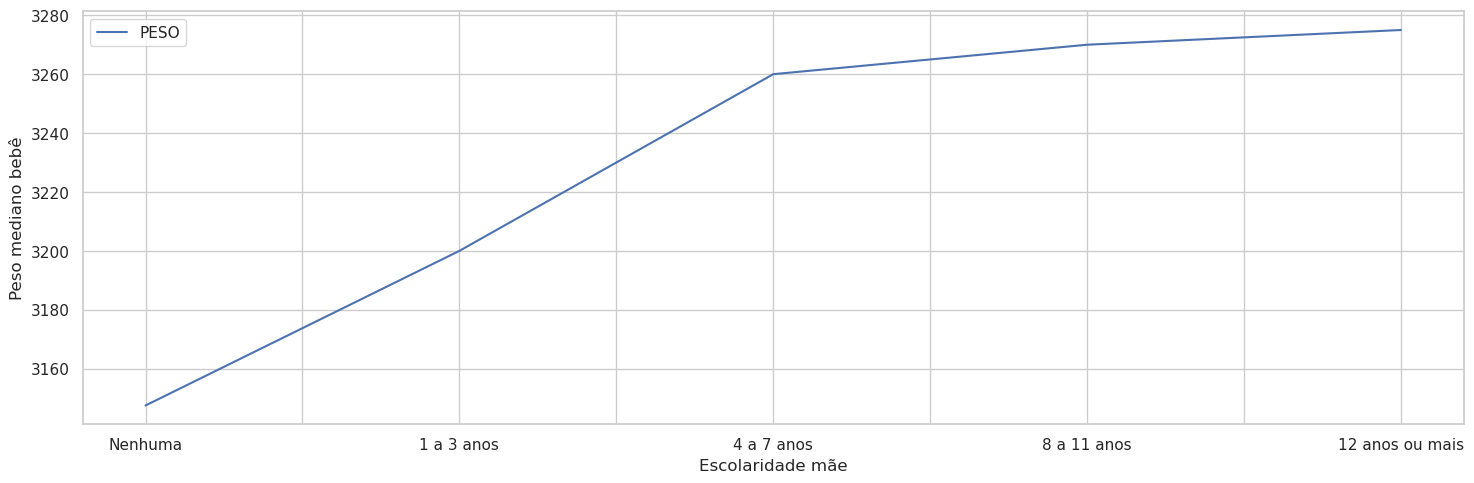

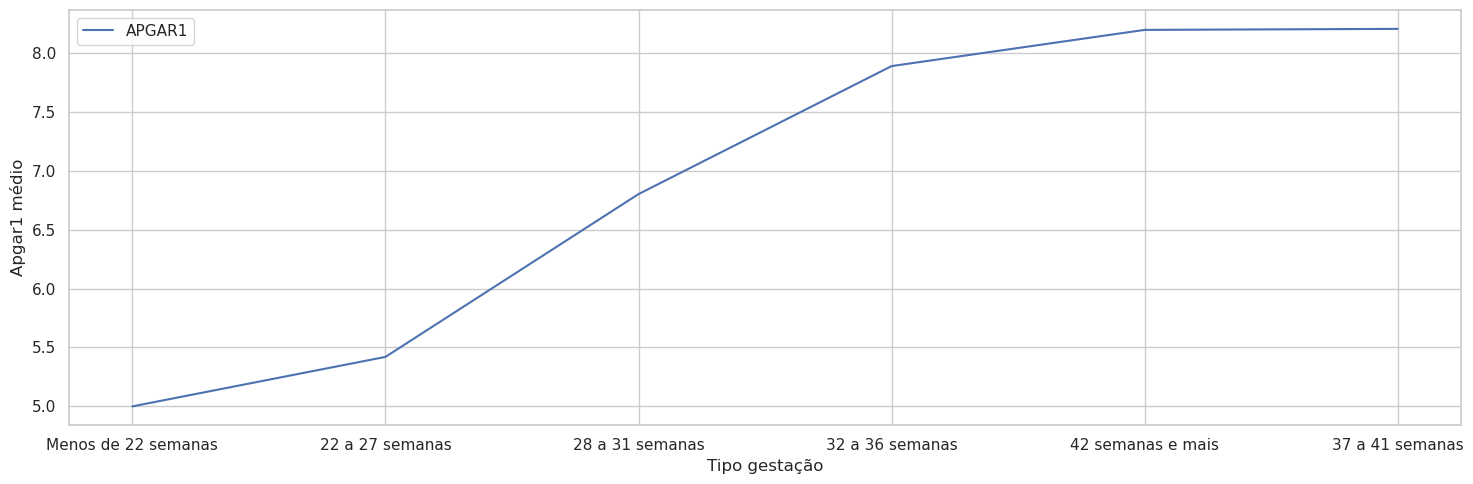

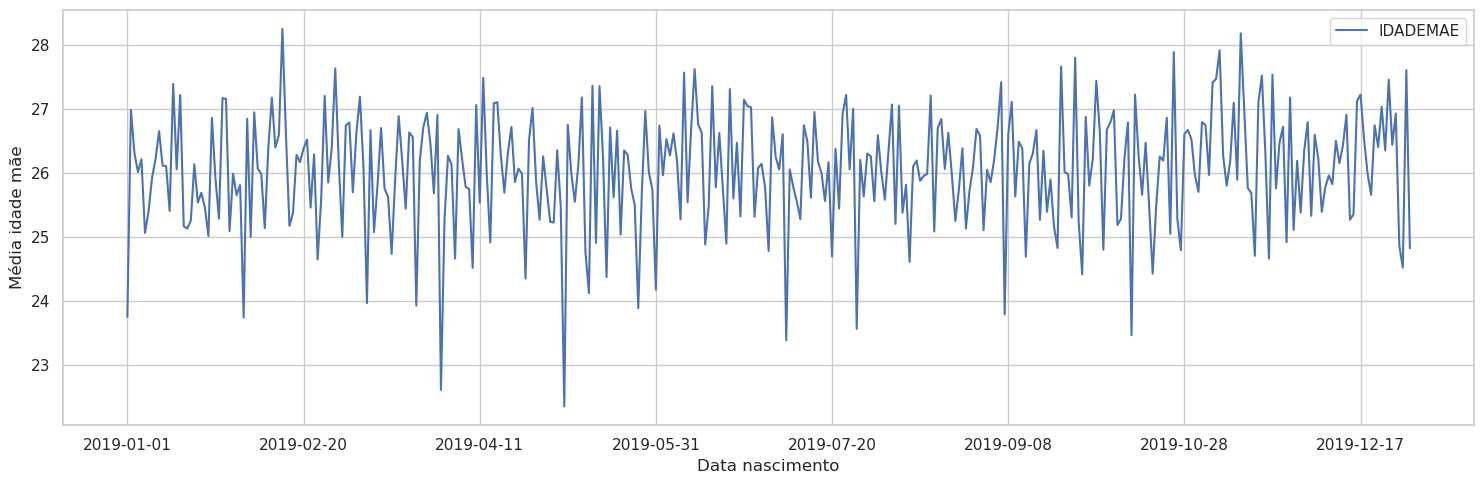

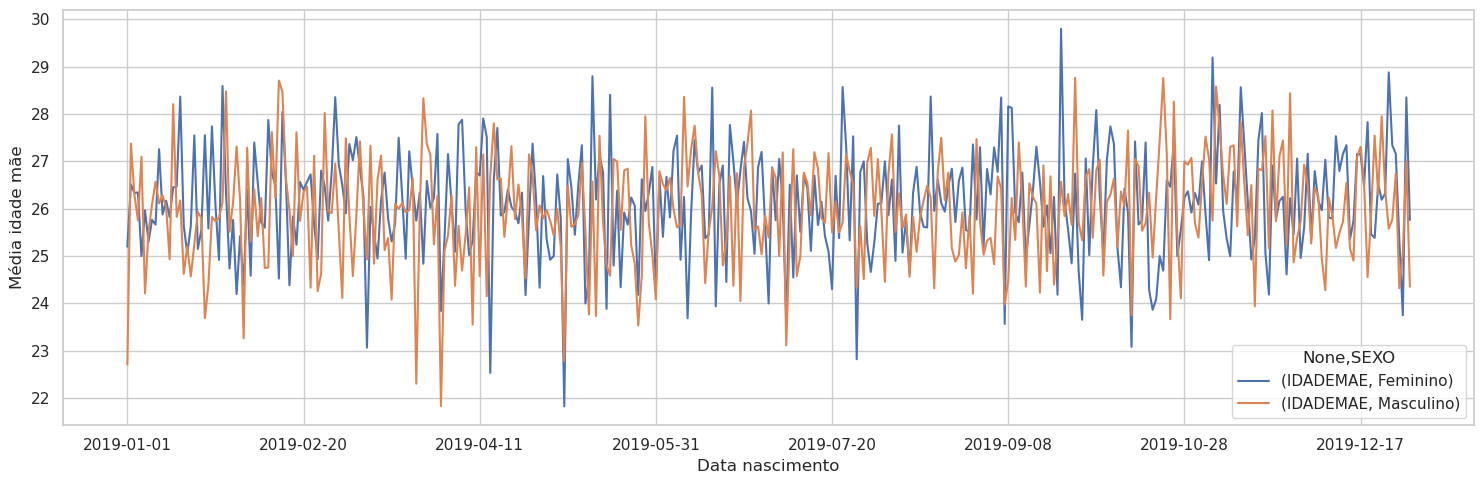

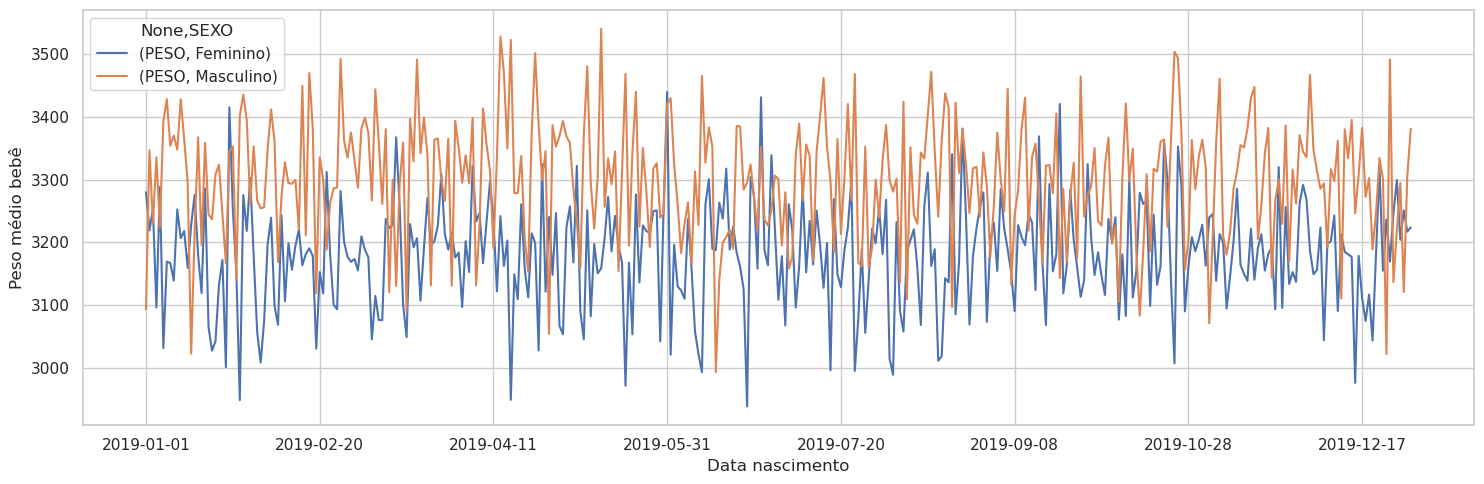

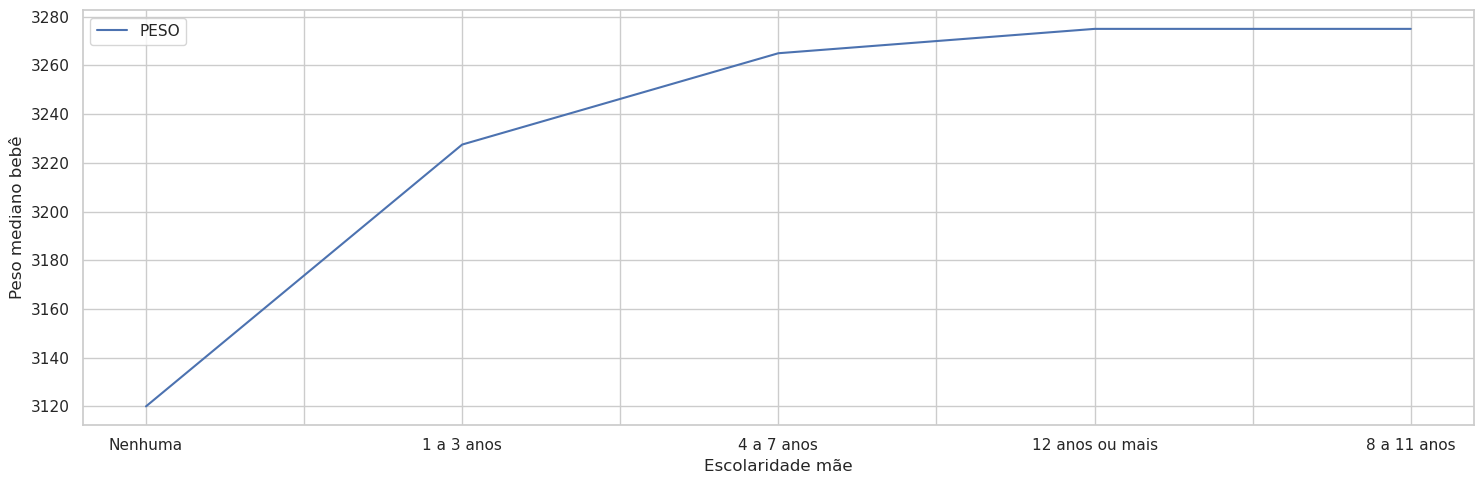

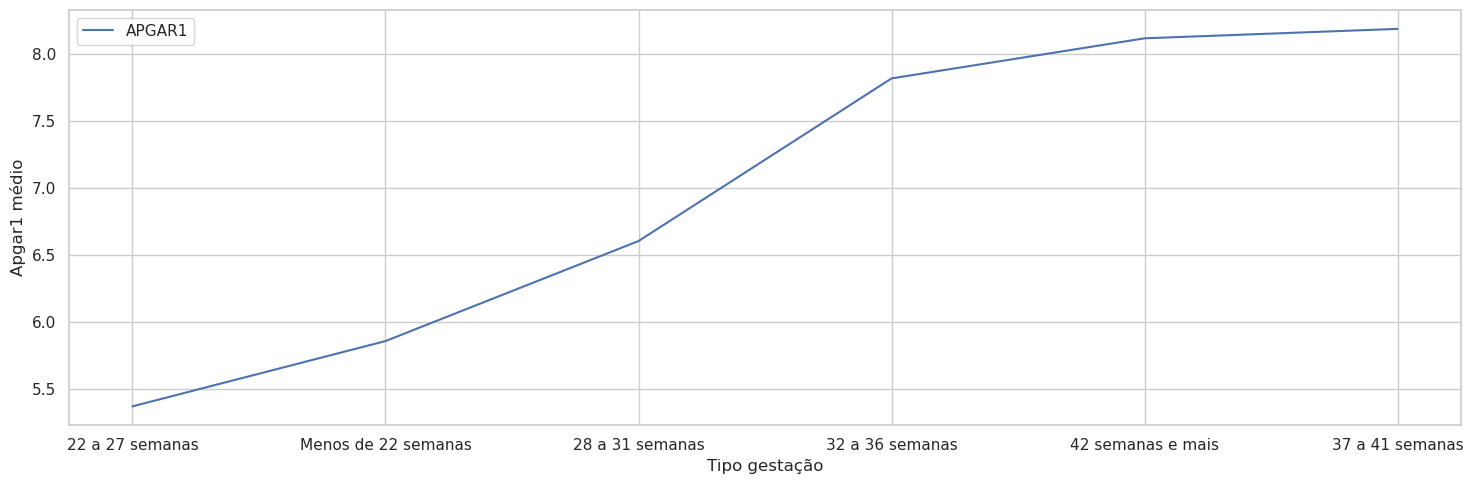

In [4]:
# Imports necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Estilo dos gráficos
sns.set(style="whitegrid")

# Dicionário para mapear abreviações para números de meses
mes_abrev_para_num = {
    'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04',
    'MAI': '05', 'JUN': '06', 'JUL': '07', 'AGO': '08',
    'SET': '09', 'OUT': '10', 'NOV': '11', 'DEZ': '12'
}

# Função auxiliar para plotar gráficos
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    tabela = pd.pivot_table(df, values=value, index=index, aggfunc=func)

    if opcao == 'unstack':
        tabela = tabela.unstack()
    elif opcao == 'sort':
        tabela = tabela.sort_values(value)

    tabela.plot(figsize=(15, 5))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.tight_layout()

# Função principal para um mês específico
def gerar_graficos_para_mes(mes_abrev):
    mes_abrev = mes_abrev.upper()

    if mes_abrev not in mes_abrev_para_num:
        print(f"[AVISO] Mês inválido: {mes_abrev}")
        return

    nome_arquivo = f'./SINASC_RO_2019_{mes_abrev}.csv'
    try:
        df = pd.read_csv(nome_arquivo)
    except FileNotFoundError:
        print(f"[ERRO] Arquivo não encontrado: {nome_arquivo}")
        return

    max_data = df.DTNASC.max()[:7]  # Ex: 2019-03
    pasta_saida = f'./output/figs/{max_data}'
    os.makedirs(pasta_saida, exist_ok=True)

    # Gráficos
    plota_pivot_table(df, 'IDADEMAE', 'DTNASC', 'mean', 'Média idade mãe', 'Data nascimento')
    plt.savefig(f'{pasta_saida}/media_idade_mae_por_data.png')

    plota_pivot_table(df, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'Média idade mãe', 'Data nascimento', 'unstack')
    plt.savefig(f'{pasta_saida}/media_idade_mae_por_sexo.png')

    plota_pivot_table(df, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'Peso médio bebê', 'Data nascimento', 'unstack')
    plt.savefig(f'{pasta_saida}/peso_medio_bebe_por_sexo.png')

    plota_pivot_table(df, 'PESO', 'ESCMAE', 'median', 'Peso mediano bebê', 'Escolaridade mãe', 'sort')
    plt.savefig(f'{pasta_saida}/peso_mediano_por_escolaridade_mae.png')

    plota_pivot_table(df, 'APGAR1', 'GESTACAO', 'mean', 'Apgar1 médio', 'Tipo gestação', 'sort')
    plt.savefig(f'{pasta_saida}/apgar1_medio_por_gestacao.png')

    print(f"[OK] Gráficos gerados para {mes_abrev} → pasta: {pasta_saida}")

# Lista dos meses desejados
meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']

# Loop para gerar os gráficos de cada mês
for mes in meses:
    gerar_graficos_para_mes(mes)
